In [2]:
# linear algebra lybrary
import numpy as np 

In [3]:
# data processing lybrary
import pandas as pd 

In [4]:
# data visualization lybrary
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [5]:
# Algorithms scikit-learn lybrary
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [6]:
# Getting data
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [7]:
# Data Exploration/Analysis
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Coloumn Description<br>
PassengerId :   Unique ID of a passenger.<br>
Survived    :   1 = passenger survived the disaster, 0 = didn't survived.<br>
Pclass      :   Ticket class. (int64)<br>
Age         :   Age in years. (float64)<br>
Sex         :   Sex in male and female.<br>
SibSp       :   # of siblings / spouses aboard the Titanic.<br>
Parch       :   # of parents / children aboard the Titanic.<br>
Ticket      :   Ticket number.<br>
Fare        :   Pasenger fare. (float64)<br>
Cabin       :   Cabin Number.<br>
Embark      :   Embarkation port.

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# percentage of survived passenger
len(train_df[train_df['Survived']==1])/len(train_df)*100

# the value of the calculation before is equals to Survived's means
# we can see that the range of passenger's age from 0.42 years old (min) to 80 years old (max) 
# from the count we can see which colloumn that contains missing value (age)

38.38383838383838

In [10]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


From the table above, we can note a few things. First of all, that we need to convert a lot of features into numeric ones later on, so that the machine learning algorithms can process them. Furthermore, we can see that the features have widely different ranges, that we will need to convert into roughly the same scale. We can also spot some more features, that contain missing values (NaN = not a number), that we need to deal with.

In [11]:
missing = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = round(train_df.isnull().sum().sort_values(ascending=False)/train_df.isnull().count()*100,1).sort_values(ascending=False)
missing_data = pd.concat([missing, percent_1], axis=1, keys=['Missing', '%'])
missing_data.head(len(train_df.axes[1]))

,Missing,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


The Embarked feature has only 2 missing values, which can easily be filled. It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values. The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.

In [12]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

From the array of coloumn<br>
We can see which coloumn that doesn't contribute to survival rate (Passenger_Id, Name, Ticket)

/var/folders/tm/_5b8ncvs17q86cc2l7plfl9h0000gn/T/ipykernel_4467/3519229162.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
/var/folders/tm/_5b8ncvs17q86cc2l7plfl9h0000gn/T/ipykernel_4467/3519229162.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com

Text(0.5, 1.0, 'Male')

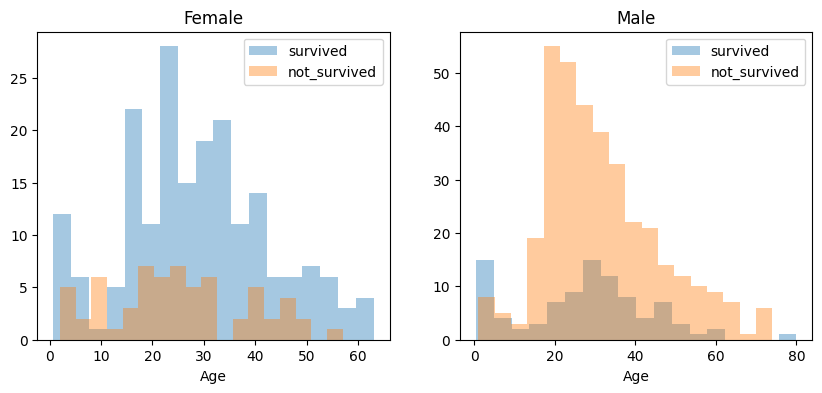

In [13]:
survived = 'survived'
not_survived = 'not_survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

women = train_df[train_df['Sex']=='female']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=18, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

men  = train_df[train_df['Sex']=='male']
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label= survived, ax = axes[1], kde=False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=18, label= not_survived, ax = axes[1], kde=False)
ax.legend()
ax.set_title('Male')

From the pictures of distribution before<br>
Female have higher survival probability than Male, especialy from 14 to 40 years old.<br>
In the range of 20 to 38 years old, male have high probability of survival probability.<br>
Also infant have high survival probability for both gender.

/Users/user/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/user/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/user/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/user/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

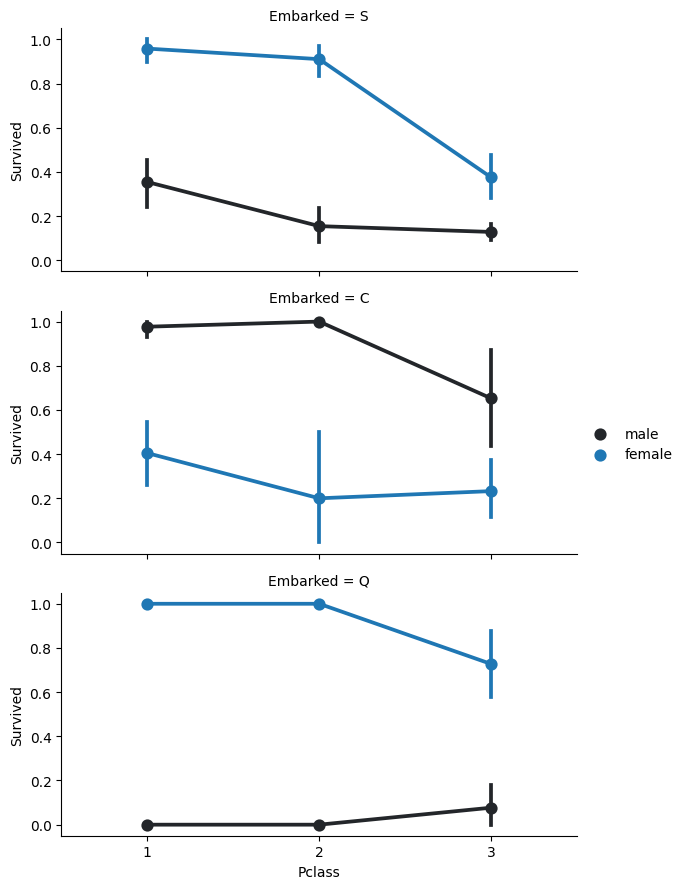

In [14]:
facetgrid = sns.FacetGrid(train_df, row='Embarked',aspect=2)
facetgrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = None,  order=None, hue_order=None)
facetgrid.add_legend()

Embarked seems to be corelated to survival probability.<br>
Male have higher surivival probability rate than female in port C and vice versa in another port.<br>
We need to dig more deeper on Pclass corelation.

/Users/user/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/user/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/user/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Pclass', ylabel='Survived'>

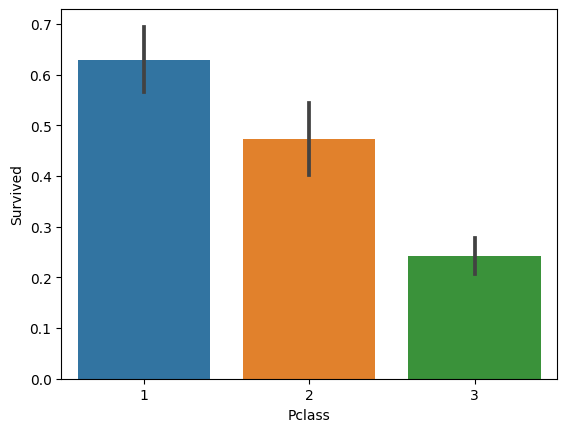

In [15]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

Pclass = 1 seems contributing to survival.

/Users/user/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/user/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


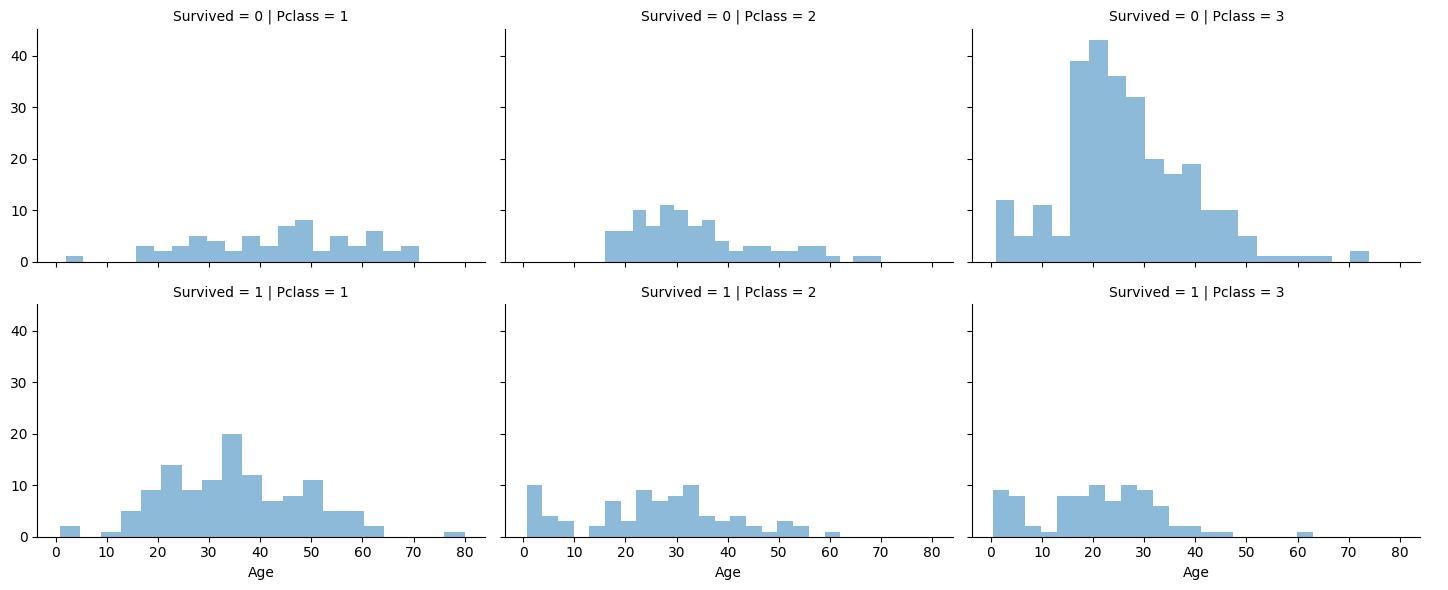

In [16]:
grid = sns.FacetGrid(train_df, col = 'Pclass', row = 'Survived', aspect = 1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

These plots above affirm our assumption before and it also pointing that Pclass = 3 will most likely not survive.

In [17]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
    
train_df['not_alone'].value_counts()
    

not_alone
1    537
0    354
Name: count, dtype: int64

/Users/user/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/user/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/user/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

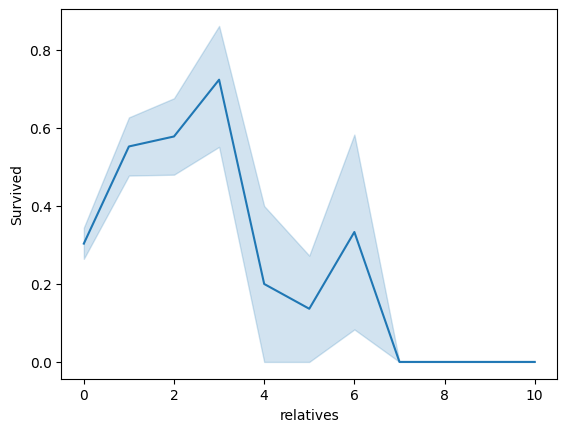

In [18]:
axes = sns.lineplot(data = train_df, x='relatives',y='Survived')

From the line port above, it shown passenger with 1-3 relatives had higher survival probability except with 6 relatives.

<h1> Data Processing <h1>

I will drop the PassengerId because it does not contribute to survival probability.

In [19]:
train_df = train_df.drop(['PassengerId'], axis=1)

<h4> Missing Data <h4>

Cabin:<br>
Cabin is missing 687 data (77.1%). It's probably find if you just drop it.<br>
But, further investigation show that letter in the cabin number reffers to the deck. Therefore we are goint to extract and convert it to numberical value. The missing values converted to zero.

In [20]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
    

In [21]:
# now we can drop cabin
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

Age:<br>
To tackle missing value in Age. We can fill it with generated random value that relevant with the existing data.<br>
Which are computed based on mean age value in regards to the standar deviation and is_null.

In [22]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill missing values in Age with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
    
train_df["Age"].isnull().sum()

0

Embarked:<br>
Since embarked only missing 2 values, we will fill it with common value.

In [23]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [24]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset["Embarked"]=dataset["Embarked"].fillna(common_value)
    
train_df["Embarked"].isnull().sum()

0

Converting colloumn's data type

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int64  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int64  
 12  Deck       891 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


As we can see "Fare" is float and "Name", "Sex", "Ticket", and "Embarked" are object.

Fare :<br>
Converting "Fare" from float64 to int64, using the "astype()" function pandas provides:

In [26]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

Name :<br>
We will extract name's title so that we can generate new colloumn out of it.

In [27]:
train_df.Name.str.extract(' ([A-Za-z]+)\.', expand = False).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [28]:
data = [train_df, test_df]
titles = {"Mr" : 1, "Miss" : 2, "Mrs" : 3, "Master" : 4, "Rare" : 5}

for dataset in data:
    # extract title from "Name"
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
    # replace uncommon titles as "Rare"
    dataset['Title'] = dataset['Title'].replace(['Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countes', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert title to number using titles map
    dataset['Title'] = dataset['Title'].map(titles)
    # Fill NaN with 0
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [29]:
data = [train_df, test_df]

for dataset in data:
    dataset['Title'] = dataset['Title'].fillna(0)
    dataset['Title'] = dataset['Title'].astype(int)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Survived   891 non-null    int64 
 1   Pclass     891 non-null    int64 
 2   Sex        891 non-null    object
 3   Age        891 non-null    int64 
 4   SibSp      891 non-null    int64 
 5   Parch      891 non-null    int64 
 6   Ticket     891 non-null    object
 7   Fare       891 non-null    int64 
 8   Embarked   891 non-null    object
 9   relatives  891 non-null    int64 
 10  not_alone  891 non-null    int64 
 11  Deck       891 non-null    int64 
 12  Title      891 non-null    int64 
dtypes: int64(10), object(3)
memory usage: 90.6+ KB


Sex :<br>
convert "Sex" into int

In [30]:
print(train_df['Sex'].unique())

['male' 'female']


In [31]:
genders = {"male" : 0, "female" : 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

print(train_df['Sex'].unique())

for dataset in data:
    dataset['Sex'] = dataset['Sex'].fillna(0)
    dataset['Sex'] = dataset['Sex'].astype(int)

train_df.info()

[0 1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Survived   891 non-null    int64 
 1   Pclass     891 non-null    int64 
 2   Sex        891 non-null    int64 
 3   Age        891 non-null    int64 
 4   SibSp      891 non-null    int64 
 5   Parch      891 non-null    int64 
 6   Ticket     891 non-null    object
 7   Fare       891 non-null    int64 
 8   Embarked   891 non-null    object
 9   relatives  891 non-null    int64 
 10  not_alone  891 non-null    int64 
 11  Deck       891 non-null    int64 
 12  Title      891 non-null    int64 
dtypes: int64(11), object(2)
memory usage: 90.6+ KB


Embarked : <br>

In [32]:
print(train_df['Embarked'].unique())

['S' 'C' 'Q']


In [33]:
ports = {"S" : 0, "C" : 1, "Q" : 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

Ticket : <br>

In [34]:
train_df[['Ticket', 'Survived']].head(10)

,Ticket,Survived
0,A/5 21171,0
1,PC 17599,1
2,STON/O2. 3101282,1
3,113803,1
4,373450,0
5,330877,0
6,17463,0
7,349909,0
8,347742,1
9,237736,1


In [35]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

Since there are 681 unique tickets. It will be difficult to convert it into userful colloumn. So we will drop it.

In [36]:
train_df = train_df.drop(['Ticket'], axis = 1)
test_df = test_df.drop(['Ticket'], axis = 1)

In [37]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Survived   891 non-null    int64
 1   Pclass     891 non-null    int64
 2   Sex        891 non-null    int64
 3   Age        891 non-null    int64
 4   SibSp      891 non-null    int64
 5   Parch      891 non-null    int64
 6   Fare       891 non-null    int64
 7   Embarked   891 non-null    int64
 8   relatives  891 non-null    int64
 9   not_alone  891 non-null    int64
 10  Deck       891 non-null    int64
 11  Title      891 non-null    int64
dtypes: int64(12)
memory usage: 83.7 KB


Creating Categories :

Age : <br>
Now we will group the 'Age' into new Age Group. Be aware with grouping to much data to one group!

In [38]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[dataset['Age'] > 66, 'Age'] = 6

In [39]:
# let see how the distributed age
train_df['Age'].value_counts().sort_values(ascending=False)

Age
4    161
5    160
6    157
3    132
2    124
1     89
0     68
Name: count, dtype: int64

Fare :<br>
We need to do the same to 'Fare' as 'Age'. But if we group the fare equally then 80% of the values would falls to the first catagory.

In [40]:
pd.qcut(train_df['Fare'],q=6)

0      (-0.001, 7.0]
1      (52.0, 512.0]
2      (-0.001, 7.0]
3      (52.0, 512.0]
4         (7.0, 8.0]
           ...      
886      (8.0, 14.0]
887     (26.0, 52.0]
888     (14.0, 26.0]
889     (26.0, 52.0]
890    (-0.001, 7.0]
Name: Fare, Length: 891, dtype: category
Categories (6, interval[float64, right]): [(-0.001, 7.0] < (7.0, 8.0] < (8.0, 14.0] < (14.0, 26.0] < (26.0, 52.0] < (52.0, 512.0]]

In [41]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5

In [42]:
# let see how the distributed fare
train_df['Fare'].value_counts().sort_values(ascending=False)

Fare
0    241
2    223
1    216
3    158
4     44
5      9
Name: count, dtype: int64

Creating new colloumns<br>
1. Age_Class
2. Fare_Per_Person

In [43]:
data = [train_df, test_df]

for dataset in data:
    dataset['Age_Class'] = dataset['Age'] * dataset['Pclass']
    
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare'] / (dataset['relatives'] + 1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
    
# let's take a look at training data set before we start training the models.
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,4,0,0,1,2,0,1,8,1,12,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1


Building Machine Learning Models.<br>
Now we will train several machine learning models and compare their results.<br>
Note that because the dataset does not provide lables for their testing-set, we need to use predictions on the training set to compare the algorithms with each other. Later on, we will use cross validation.

In [44]:
X_train = train_df.drop("Survived", axis = 1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis = 1).copy()

Stochastic Gradient Descent (SGD) :

In [45]:
sgd = linear_model.SGDClassifier(max_iter = 20000, tol = None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

Random Forest :

In [46]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

random_forrest_x_test = X_test

Logistic Regression :

In [47]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

K Nearest Neighbor :

In [48]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train))

Gaussian Naive Bayes :

In [49]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

Perceptron :

In [50]:
perceptron = Perceptron(max_iter = 20000)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

Linear Support Vector Machine :

In [51]:
linear_svc = LinearSVC(dual = True, max_iter = 20000)
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

Decision Tree : 

In [52]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

Which is the best Model?

In [53]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
92.70,Random Forest
92.70,Decision Tree
81.71,Logistic Regression
81.59,Stochastic Gradient Decent
81.37,Support Vector Machines
77.22,Naive Bayes
71.72,Perceptron
1.00,KNN


As we can see, the Random Forest classifier goes on the first place. But first, let us check, how random-forest performs, when we use cross validation.

K-Fold Cross Validation :

K-Fold Cross Validation randomly splits the training data into K subsets called folds. Let's imagine we split our data to four folds (k=4). Our random forest model would be trained and evaluated 4 times, using different fold of evaluation everytime, while it would trained on the remaining 3 folds.<br>
<br>
The image below shows the process, using 4 folds. Every row represent one training + evaluation process. In the first row, the model get's trained on the first, second, and third subset evaluated on the fourth. In the second row, the model get's trained on the second, third, and fourth and evaluated on the first.<br>
<br>
K-Fold Cross Validation repeats this process till every fold acted once as and evaluation fold.

![Alt text](image.png)

The result of our K-Fold Cross Validation example would be an array that contains 4 different scores. Then we need to compute the mean and the standar deviation for theese scores.

In [54]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv = 10, scoring = "accuracy")

print("Scores :", np.round(scores * 100, 2))
print("Mean :", np.round(scores.mean() * 100, 2))
print("Standard Deviation :", np.round(scores.std() * 100, 2))

Scores : [77.78 86.52 76.4  84.27 87.64 85.39 82.02 76.4  86.52 85.39]
Mean : 82.83
Standard Deviation : 4.17


Those values shows that the score of our model is more realistic than before. With the average of 82% and a standard deviation of 4%

Colloumn/feature Importance

Another great quality of random forest is that they make it very easy to measure the relative importance of each feature. Sklearn measure a features importance by looking at how much the tree nodes, that used that feature, reduce impurity on average (across all trees in the forest). It compute the score automaticall for each feature after training and scales after training and scales the result so that the sum of all importances is equal to 1. We will acces this below:

In [59]:
importances = pd.DataFrame({'feature' : X_train.columns, 'importance' : np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Sex,0.197
Title,0.172
Age_Class,0.098
Pclass,0.086
Age,0.078
Deck,0.075
Fare,0.069
relatives,0.061
Embarked,0.054


<Axes: xlabel='feature'>

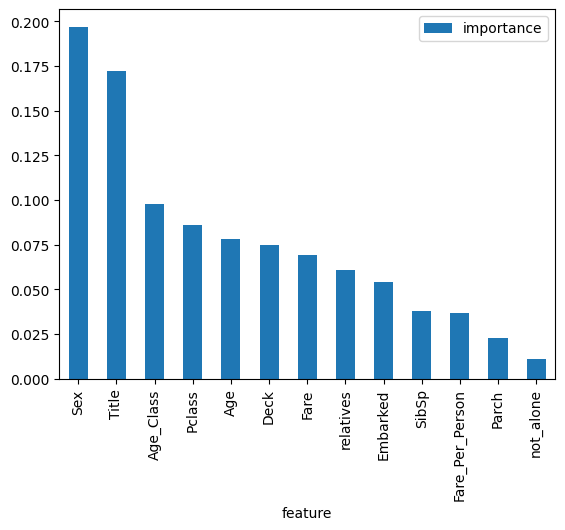

In [57]:
importances.plot.bar()

Conclusion :

not_alone and Parch doesn't play a significant role in our random forest classifiers prediction process. Because that, I will drop them from the dataset and train the classifier again. We could also remove more or less features, but this might need more detailed investigation of the features affect on our model. But I think it's just fine to remove only not_alone and Parch.

In [60]:
train_df = train_df.drop("not_alone", axis=1)
test_df = test_df.drop("not_alone", axis=1)

train_df = train_df.drop("Parch", axis=1)
test_df = test_df.drop("Parch", axis=1)

Training random forest again :

In [61]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score=True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.7 %


Our random forest model predict as good as it did before. A general rule is that, <b>the more features you have, the more likely your model will suffer from overfitting</b> and vice versa. But I think  our data looks fine for now and hasn't too much features.

There is also another way to evaluate a random forest classifier, which is probably more accurate than the score we used before. What I am talking about is <b>out-of-bag samples</b> to estimate generalization accuracy. I will not go into details here about how it works. Just note that out-of-bag estimate is as accurate as using a test set of the same size as the training set. Therefore, using the out-of-bag error estimates removes the need for a set aside test set.

In [66]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 81.47999999999999 %


Now we can start tuning the hyperparameters of random forest.

Hyperparameter Tuning.

Below you can see the code of hyperparameter tuning for parameters criterion, min_samples_leaf, min_samples_split, and n_estimators.

In [73]:
param_grid = {"criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators" : [100, 400, 700, 1000, 1500]}

from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestClassifier(n_estimators=100, max_features=15, oob_score=True, random_state=1, n_jobs=-1)

clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

clf.fit(X_train, Y_train)

clf.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 5,
 'min_samples_split': 16,
 'n_estimators': 100}

Test new parameters :

In [75]:
# Random Forest
random_forest = RandomForestClassifier(criterion= 'gini'
                                       , min_samples_leaf=5
                                       , min_samples_split=16
                                       , n_estimators=100
                                       , max_features=15
                                       , oob_score=True
                                       , random_state=1
                                       , n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score :", round(random_forest.oob_score_,4) * 100, "%")

oob score : 83.5 %


Now that we have a proper model, we can start evaluating it’s performace in a more accurate way. Previously we only used accuracy and the oob score, which is just another form of accuracy. The problem is just, that it’s more complicated to evaluate a classification model than a regression model. We will talk about this in the following section.